In [3]:

import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns


Bad key text.latex.preview in file C:\Users\Dan\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Dan\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Dan\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the de

In [3]:
data = yf.download('GOLD', start="2000-01-01", end="2023-07-30", interval='1d')
data.index = pd.to_datetime(data.index)
data = data.resample("M").last()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

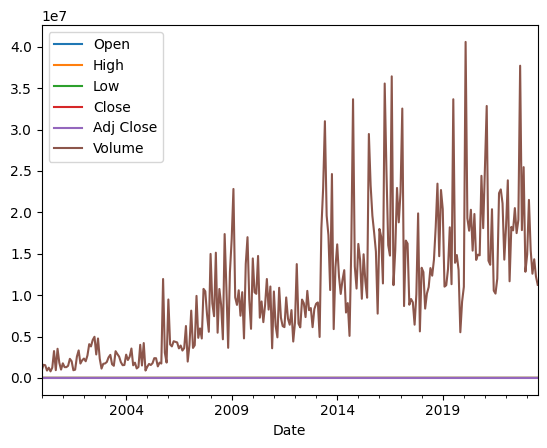

In [4]:
data.plot()

In [5]:
data.to_csv('etf_gold')

In [6]:
sp500 = yf.download('^GSPC', start="2000-01-01", end="2023-07-30", interval='1d')
sp500.index = pd.to_datetime(sp500.index)
sp500 = sp500.resample("M").last()

[*********************100%***********************]  1 of 1 completed


In [7]:
sp500.to_csv('sp500_data')

In [8]:
dollar_index = yf.download('DXY', start="2000-01-01", end="2023-07-30", interval='1d')
dollar_index.index = pd.to_datetime(dollar_index.index)
dollar_index = dollar_index.resample("M").last()

[*********************100%***********************]  1 of 1 completed


In [9]:
dollar_index.to_csv('dollar_index')

In [10]:
bond_yield_30 = yf.download('^TYX', start="2000-01-01", end="2023-07-30", interval='1d')
bond_yield_30.index = pd.to_datetime(bond_yield_30.index)
bond_yield_30 = bond_yield_30.resample("M").last()

[*********************100%***********************]  1 of 1 completed


In [11]:
bond_yield_30.to_csv('30_yr_bond')

In [12]:
bond_yield_10 = yf.download('^TNX', start="2000-01-01", end="2023-07-30", interval='1d')
bond_yield_10.index = pd.to_datetime(bond_yield_10.index)
bond_yield_10 = bond_yield_10.resample("M").last()

[*********************100%***********************]  1 of 1 completed


In [13]:
bond_yield_10.to_csv('10_yr_bond')

In [14]:
bond_yield_5 = yf.download('^FVX', start="2000-01-01", end="2023-07-30", interval='1d')
bond_yield_5.index = pd.to_datetime(bond_yield_5.index)
bond_yield_5 = bond_yield_5.resample("M").last()

[*********************100%***********************]  1 of 1 completed


In [15]:
bond_yield_5.to_csv('5_yr_bond')

In [16]:
bond_yield_13w = yf.download('^IRX', start="2000-01-01", end="2023-07-30", interval='1d')
bond_yield_13w.index = pd.to_datetime(bond_yield_13w.index)
bond_yield_13w = bond_yield_13w.resample("M").last()

[*********************100%***********************]  1 of 1 completed


In [17]:
bond_yield_13w.to_csv('13_wk_bond')

In [18]:
sp500.index = pd.to_datetime(sp500.index)
monthly_data = sp500.resample("M").last()


In [4]:
liquidpath = Path("../Resources/FRED corrected dates/corporate_liquidity.csv")
liquid_df = pd.read_csv(liquidpath, parse_dates=True, index_col="date", infer_datetime_format=True)

In [5]:
walclpath = Path('../Resources/FRED corrected dates/total_assets.csv')
assets_df = pd.read_csv(walclpath, parse_dates=True, index_col="date", infer_datetime_format=True)

In [6]:
liquidity_assets = pd.concat([liquid_df, assets_df], axis=1, join='inner')
liquidity_assets

corporate_liquidity  total_assets
date                                         
2003-01-01            1969596.0      724718.0
2003-04-01            2134969.0      736926.0
2003-07-01            2171395.0      741656.0
2003-10-01            2274243.0      747068.0
2004-01-01            2324355.0      759938.0
...                         ...           ...
2022-01-01            6935871.0     8820580.0
2022-04-01            6189642.0     8949532.0
2022-07-01            6006974.0     8894234.0
2022-10-01            6324169.0     8746259.0
2023-01-01            6498217.0     8493903.0

[81 rows x 2 columns]

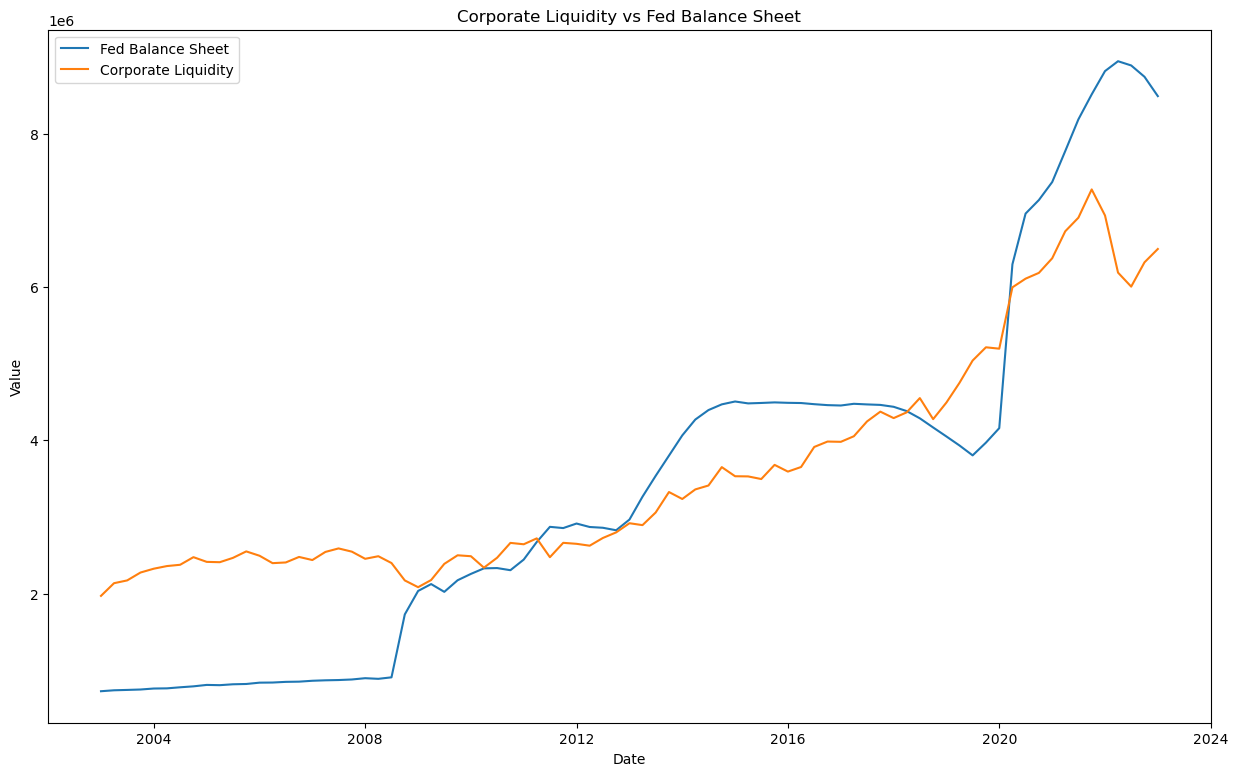

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 9))

plt.plot(liquidity_assets.index, liquidity_assets['total_assets'], label='Fed Balance Sheet')
plt.plot(liquidity_assets.index, liquidity_assets['corporate_liquidity'], label='Corporate Liquidity')



# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Corporate Liquidity vs Fed Balance Sheet')

# Add a legend
plt.legend()

# Show the plot
plt.show()
plt.savefig('Corporate Liquidity vs Fed Balance Sheet.png', dpi=300)

<AxesSubplot:>

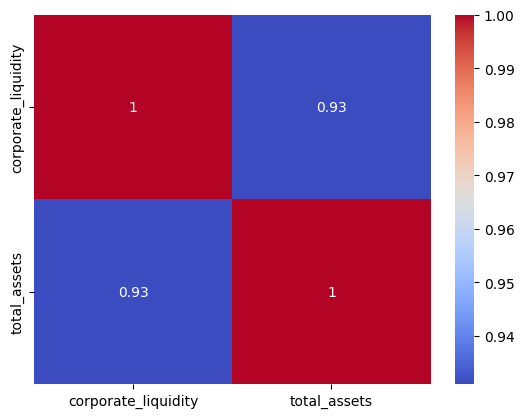

In [22]:
corr_matrix = liquidity_assets.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [23]:
rate_path = Path('effective_rate.csv')
effective_rate = pd.read_csv(rate_path, parse_dates=True, index_col="date", infer_datetime_format=True)
effective_rate

effective_rate
date                      
1954-07-01            0.80
1954-08-01            1.22
1954-09-01            1.07
1954-10-01            0.85
1954-11-01            0.83
...                    ...
2023-03-01            4.65
2023-04-01            4.83
2023-05-01            5.06
2023-06-01            5.08
2023-07-01            5.12

[829 rows x 1 columns]

In [24]:
effective_liquidity = pd.concat([liquid_df, effective_rate], axis=1, join='inner')
effective_liquidity

corporate_liquidity  effective_rate
date                                           
1954-07-01              45623.0            0.80
1954-10-01              48373.0            0.85
1955-01-01              47075.0            1.39
1955-04-01              47332.0            1.43
1955-07-01              49775.0            1.68
...                         ...             ...
2022-01-01            6935871.0            0.08
2022-04-01            6189642.0            0.33
2022-07-01            6006974.0            1.68
2022-10-01            6324169.0            3.08
2023-01-01            6498217.0            4.33

[275 rows x 2 columns]

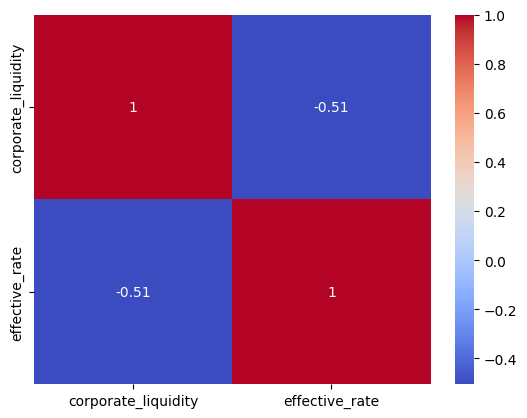

In [62]:
corr_matrix = effective_liquidity.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('seaborn corporate liquidity vs Fed rates.png')

In [11]:
condopath = Path('city_condo_smoothed_by_date.csv')
condos = pd.read_csv(condopath)
columns_to_select = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
condos = condos.iloc[:, columns_to_select]

FileNotFoundError: [Errno 2] No such file or directory: 'city_condo_smoothed_by_date.csv'

In [27]:
condos

date       New York    Los Angeles        Houston        Chicago  \
0    2000-01-31  140391.981926  218490.626872   98805.723619  124245.408935   
1    2000-02-29  141145.122836  218799.511982   98779.276115  124280.127900   
2    2000-03-31  141909.677580  219746.146365   98641.818356  124596.274473   
3    2000-04-30  143388.189791  221629.705836   98597.642929  125397.904848   
4    2000-05-31  144872.164609  223998.145277   98579.734704  126469.999364   
..          ...            ...            ...            ...            ...   
277  2023-02-28  678282.653622  931763.389476  264551.198302  285628.744382   
278  2023-03-31  682910.901887  920231.020434  263822.415637  287352.697452   
279  2023-04-30  690942.081845  914510.903613  263627.658306  287809.867413   
280  2023-05-31  702490.656340  915677.727358  263897.802873  288596.320660   
281  2023-06-30  716097.351816  922548.036229  264539.685482  290377.564895   

       San Antonio   Philadelphia        Phoenix      Las Vegas  \
0     97829.737112   56916.850432  117244.930193  160666.547217   
1     97921.501155   57034.454029  117531.522392  160640.225524   
2     97991.762941   57148.221328  117898.820920  160903.485085   
3     98117.809185   57401.218845  118683.045315  161517.240796   
4     97666.735377   57786.646407  119551.547662  162323.675727   
..             ...            ...            ...            ...   
277  264757.308479  224143.910288  414274.122613  399410.001777   
278  264936.990469  223952.402939  412505.064527  396527.489865   
279  264950.972541  222952.017708  411231.178233  395094.535695   
280  265106.964969  222663.955101  411080.521691  394681.241515   
281  265321.957844  223044.434618  412402.439701  395714.657308   

         San Diego         Dallas  
0    217916.040239   93906.833661  
1    218923.103357   93968.439991  
2    220075.230069   94002.823251  
3    222681.763640   94118.669283  
4    225453.301006   94319.615262  
..             ...            ...  
277  915736.250391  311809.279260  
278  915980.415824  311597.388822  
279  920086.263076  311136.937680  
280  927256.147270  311215.969480  
281  937452.776699  311880.260441  

[282 rows x 11 columns]

In [28]:
bond_yield_30.reset_index(inplace=True)

In [29]:
condos_by_bond = pd.concat([bond_yield_30, condos], axis=1, join='inner')


In [30]:
condos_by_bond = condos_by_bond.drop(['date', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

In [31]:
columns_to_select = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
top_condos_by_bond = condos_by_bond.iloc[:, columns_to_select]


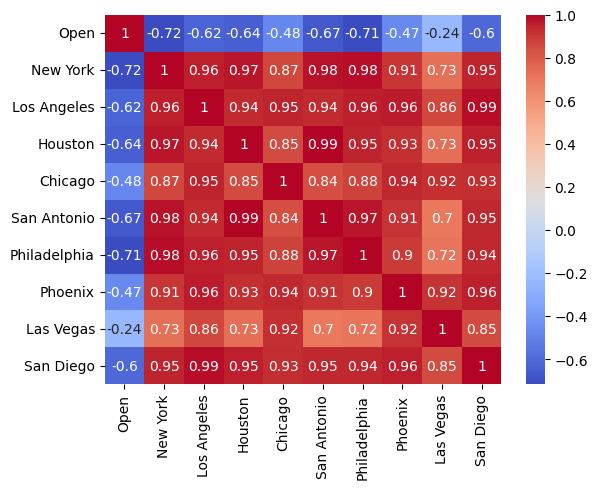

In [61]:
corr_matrix = top_condos_by_bond.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig("seaborn Metro Condos vs 30 Yr Bond.png")


In [33]:
sp500.reset_index(inplace=True)

In [34]:
sp500 = sp500.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

In [35]:
condos_by_sp500 = pd.concat([condos, sp500], axis=1, join='inner')


In [36]:
condos_by_sp500 = condos_by_sp500.drop(['Date'], axis=1)

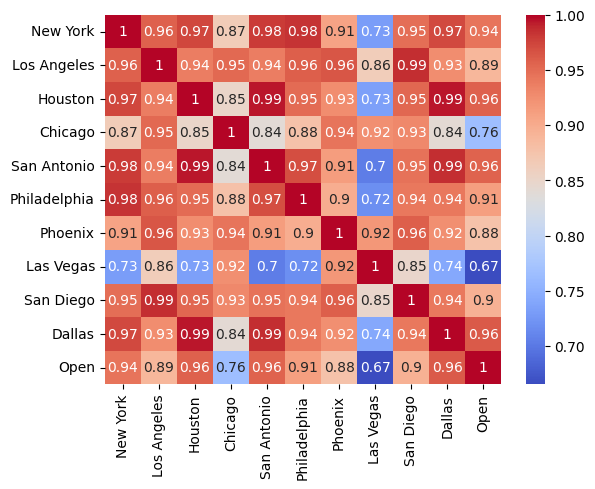

In [60]:
corr_matrix = condos_by_sp500.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('seaborn Metro Condos vs SP500.png')

In [38]:
data.reset_index(inplace=True)

In [39]:
gold = data.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

In [40]:
gold_by_condos = pd.concat([gold, condos], axis=1, join='inner')
gold_by_condos = gold_by_condos.drop(['date'], axis=1)

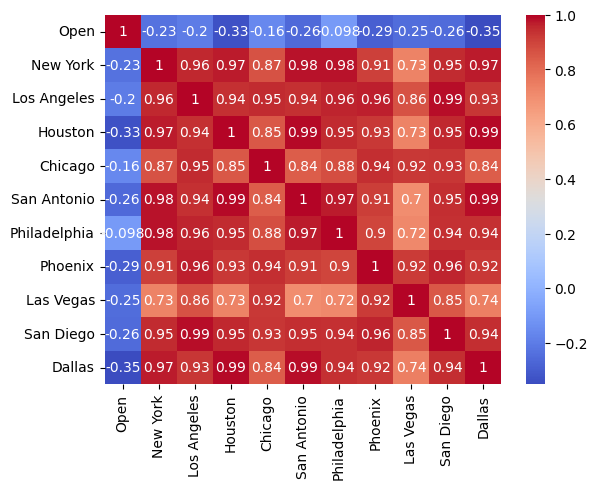

In [59]:
corr_matrix = gold_by_condos.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('seaborn Metro Condos vs Gold.png')

In [42]:
filepath = Path('corporate_liquidity (1).csv')
corp_liquid = pd.read_csv(filepath)
corp_liquid.rename(columns={'date': 'Date'}, inplace=True)

In [43]:
filepath = Path('effective_rate (1).csv')
eff_rate = pd.read_csv(filepath)
eff_rate.rename(columns={'date': 'Date'}, inplace=True)

In [44]:
filepath = Path('CPI.csv')
cpi = pd.read_csv(filepath)
cpi.rename(columns={'date': 'Date'}, inplace=True)

In [45]:
corp_liquid_condos = pd.concat([condos, corp_liquid], axis=1, join='inner')
corp_liquid_condos.drop(['Date'], axis=1)

date       New York    Los Angeles        Houston        Chicago  \
0    2000-01-31  140391.981926  218490.626872   98805.723619  124245.408935   
1    2000-02-29  141145.122836  218799.511982   98779.276115  124280.127900   
2    2000-03-31  141909.677580  219746.146365   98641.818356  124596.274473   
3    2000-04-30  143388.189791  221629.705836   98597.642929  125397.904848   
4    2000-05-31  144872.164609  223998.145277   98579.734704  126469.999364   
..          ...            ...            ...            ...            ...   
277  2023-02-28  678282.653622  931763.389476  264551.198302  285628.744382   
278  2023-03-31  682910.901887  920231.020434  263822.415637  287352.697452   
279  2023-04-30  690942.081845  914510.903613  263627.658306  287809.867413   
280  2023-05-31  702490.656340  915677.727358  263897.802873  288596.320660   
281  2023-06-30  716097.351816  922548.036229  264539.685482  290377.564895   

       San Antonio   Philadelphia        Phoenix      Las Vegas  \
0     97829.737112   56916.850432  117244.930193  160666.547217   
1     97921.501155   57034.454029  117531.522392  160640.225524   
2     97991.762941   57148.221328  117898.820920  160903.485085   
3     98117.809185   57401.218845  118683.045315  161517.240796   
4     97666.735377   57786.646407  119551.547662  162323.675727   
..             ...            ...            ...            ...   
277  264757.308479  224143.910288  414274.122613  399410.001777   
278  264936.990469  223952.402939  412505.064527  396527.489865   
279  264950.972541  222952.017708  411231.178233  395094.535695   
280  265106.964969  222663.955101  411080.521691  394681.241515   
281  265321.957844  223044.434618  412402.439701  395714.657308   

         San Diego         Dallas  corporate_liquidity  
0    217916.040239   93906.833661              38652.0  
1    218923.103357   93968.439991                  NaN  
2    220075.230069   94002.823251                  NaN  
3    222681.763640   94118.669283                  NaN  
4    225453.301006   94319.615262              33594.0  
..             ...            ...                  ...  
277  915736.250391  311809.279260            3531368.0  
278  915980.415824  311597.388822            3529204.0  
279  920086.263076  311136.937680            3494827.0  
280  927256.147270  311215.969480            3679896.0  
281  937452.776699  311880.260441            3592080.0  

[282 rows x 12 columns]

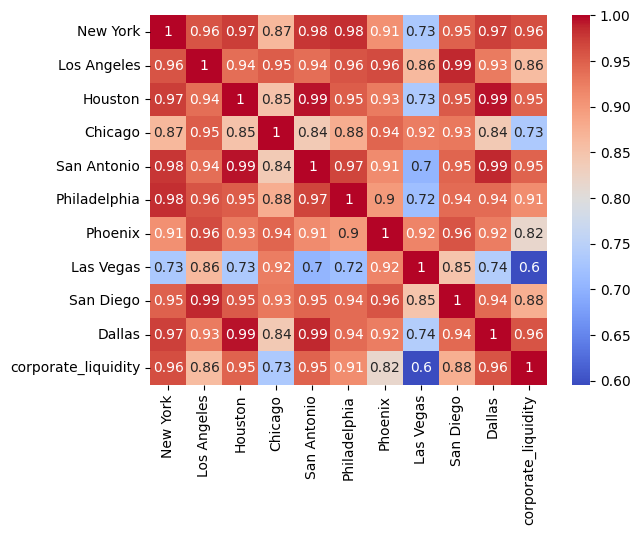

In [63]:
corr_matrix = corp_liquid_condos.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('seaborn Metro Condos vs corporate liquidity.png')

In [10]:
er_condos = pd.concat([condos, eff_rate], axis=1, join='inner')
er_condos.drop(['Date'], axis=1)

NameError: name 'condos' is not defined

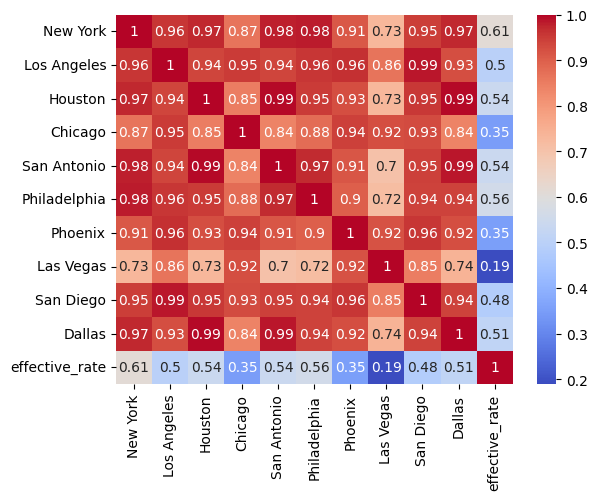

In [64]:
corr_matrix = er_condos.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('seaborn Metro Condos vs Effective Rate.png')

In [49]:
cpi_condos = pd.concat([condos, cpi], axis=1, join='inner')
cpi_condos.drop(['Date'], axis=1)

date       New York    Los Angeles        Houston        Chicago  \
0    2000-01-31  140391.981926  218490.626872   98805.723619  124245.408935   
1    2000-02-29  141145.122836  218799.511982   98779.276115  124280.127900   
2    2000-03-31  141909.677580  219746.146365   98641.818356  124596.274473   
3    2000-04-30  143388.189791  221629.705836   98597.642929  125397.904848   
4    2000-05-31  144872.164609  223998.145277   98579.734704  126469.999364   
..          ...            ...            ...            ...            ...   
277  2023-02-28  678282.653622  931763.389476  264551.198302  285628.744382   
278  2023-03-31  682910.901887  920231.020434  263822.415637  287352.697452   
279  2023-04-30  690942.081845  914510.903613  263627.658306  287809.867413   
280  2023-05-31  702490.656340  915677.727358  263897.802873  288596.320660   
281  2023-06-30  716097.351816  922548.036229  264539.685482  290377.564895   

       San Antonio   Philadelphia        Phoenix      Las Vegas  \
0     97829.737112   56916.850432  117244.930193  160666.547217   
1     97921.501155   57034.454029  117531.522392  160640.225524   
2     97991.762941   57148.221328  117898.820920  160903.485085   
3     98117.809185   57401.218845  118683.045315  161517.240796   
4     97666.735377   57786.646407  119551.547662  162323.675727   
..             ...            ...            ...            ...   
277  264757.308479  224143.910288  414274.122613  399410.001777   
278  264936.990469  223952.402939  412505.064527  396527.489865   
279  264950.972541  222952.017708  411231.178233  395094.535695   
280  265106.964969  222663.955101  411080.521691  394681.241515   
281  265321.957844  223044.434618  412402.439701  395714.657308   

         San Diego         Dallas    CPI  
0    217916.040239   93906.833661  21.48  
1    218923.103357   93968.439991  21.62  
2    220075.230069   94002.823251  22.00  
3    222681.763640   94118.669283  22.00  
4    225453.301006   94319.615262  21.95  
..             ...            ...    ...  
277  915736.250391  311809.279260  38.10  
278  915980.415824  311597.388822  38.30  
279  920086.263076  311136.937680  38.50  
280  927256.147270  311215.969480  38.60  
281  937452.776699  311880.260441  38.80  

[282 rows x 12 columns]

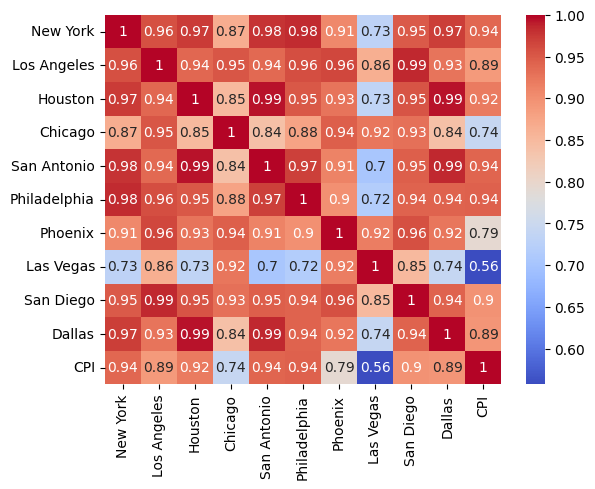

In [65]:
corr_matrix = cpi_condos.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('seaborn CPI vs Fed.png')

In [51]:
filepath = Path('total_assets (1).csv')
assets = pd.read_csv(filepath)

In [52]:
filepath = Path('top_tier_by_date.csv')
top_tier = pd.read_csv(filepath)
top_tier.rename(columns={'date': 'Date'}, inplace=True)

In [53]:
columns_to_select = (['Date', 'New York, NY', 'Los Angeles, CA', 'Houston, TX', 'Chicago, IL', 'San Antonio, TX', 'Philadelphia, PA', 'Phoenix, AZ', 'Las Vegas, NV', 'San Diego, CA', 'Dallas, TX'])
top_tier_filtered = top_tier.loc[:, columns_to_select]
top_tier

Date  United States   New York, NY  Los Angeles, CA    Chicago, IL  \
0    2000-01-31  230748.551356  337994.420707     4.279950e+05  292118.921064   
1    2000-02-29  231273.480850  339439.249268     4.297101e+05  292481.798499   
2    2000-03-31  231907.635329  340883.990673     4.318380e+05  293081.221594   
3    2000-04-30  233257.779927  343829.378174     4.361239e+05  294576.432272   
4    2000-05-31  234788.809308  346860.935593     4.407106e+05  296318.891662   
..          ...            ...            ...              ...            ...   
277  2023-02-28  653137.529388  977135.280651     1.505748e+06  482941.961913   
278  2023-03-31  652145.433278  976791.206633     1.484731e+06  483861.834496   
279  2023-04-30  652481.606536  978401.413544     1.475880e+06  484625.539691   
280  2023-05-31  654554.158983  982709.650080     1.478380e+06  486509.259035   
281  2023-06-30  657974.727824  989435.487379     1.490584e+06  489788.857723   

        Dallas, TX    Houston, TX  Washington, DC  Philadelphia, PA  \
0    245863.944634  225287.038904   305382.386002     214285.076962   
1    245884.703609  225369.290137   305739.416974     214838.620643   
2    245950.396033  225232.406054   306343.736573     215211.229849   
3    246151.886277  225391.977475   307703.936190     216143.937868   
4    246453.836559  225517.348029   309646.178302     217074.817397   
..             ...            ...             ...               ...   
277  603946.703157  490205.862261   858466.502422     543713.812605   
278  602956.701040  490756.473729   859682.436168     545800.246839   
279  603328.363772  492136.023479   863028.805241     549487.583325   
280  605167.918201  493787.982582   868395.670247     553992.329306   
281  607836.184426  495732.627037   874484.189137     558471.604218   

         Miami, FL  ...   Atchison, KS  Fairfield, IA  Vermillion, SD  \
0    229374.262846  ...            NaN            NaN             NaN   
1    230020.140819  ...            NaN            NaN             NaN   
2    230696.027800  ...            NaN            NaN             NaN   
3    232054.144062  ...            NaN            NaN             NaN   
4    233367.635177  ...            NaN            NaN             NaN   
..             ...  ...            ...            ...             ...   
277  789680.982360  ...  289113.496696  303278.485796   386270.341946   
278  789834.148932  ...  290118.292794  298845.162590   387161.391611   
279  792326.411427  ...  295638.692898  298984.275451   388293.585006   
280  796731.522007  ...  300139.902979  299565.089151   389497.874511   
281  802945.743633  ...  303247.983096  299958.786217   391241.113854   

     Sweetwater, TX      Pecos, TX     Zapata, TX  Ketchikan, AK  \
0               NaN            NaN            NaN            NaN   
1               NaN            NaN            NaN            NaN   
2               NaN            NaN            NaN            NaN   
3               NaN            NaN            NaN            NaN   
4               NaN            NaN            NaN            NaN   
..              ...            ...            ...            ...   
277   205343.049608  210594.282072  213157.643803  571859.396185   
278   207032.425100  209496.380791  216628.718647  572255.033844   
279   207542.988445  206504.296162  217465.883085  574900.024291   
280   208659.516072  207836.372266  218317.429299  577287.498325   
281   210539.837305  207918.305331  219025.967310  576820.582890   

         Craig, CO     Vernon, TX     Lamesa, TX  
0    165927.319691            NaN            NaN  
1    166233.569230            NaN            NaN  
2    166602.028640            NaN            NaN  
3    167015.464042            NaN            NaN  
4    167414.212898            NaN            NaN  
..             ...            ...            ...  
277  376542.537412  182550.548512  177686.241073  
278  378244.834098  184369.075831  179145.408428  
279  381598.270874  184857.82898

In [54]:
top_tier_assets = pd.concat([top_tier_filtered, assets], axis=1, join='inner')
top_tier_assets.drop(['date'], axis=1)

Date   New York, NY  Los Angeles, CA    Houston, TX    Chicago, IL  \
0    2000-01-31  337994.420707     4.279950e+05  225287.038904  292118.921064   
1    2000-02-29  339439.249268     4.297101e+05  225369.290137  292481.798499   
2    2000-03-31  340883.990673     4.318380e+05  225232.406054  293081.221594   
3    2000-04-30  343829.378174     4.361239e+05  225391.977475  294576.432272   
4    2000-05-31  346860.935593     4.407106e+05  225517.348029  296318.891662   
..          ...            ...              ...            ...            ...   
244  2020-05-31  821312.766913     1.156007e+06  372434.479195  406799.990112   
245  2020-06-30  820645.111663     1.147592e+06  371996.927202  405703.367911   
246  2020-07-31  818397.340214     1.144586e+06  372405.620814  404766.192295   
247  2020-08-31  816544.445012     1.152476e+06  374138.622630  405039.687812   
248  2020-09-30  819119.068188     1.171740e+06  377054.456474  407284.927188   

     San Antonio, TX  Philadelphia, PA    Phoenix, AZ  Las Vegas, NV  \
0      200992.505570     214285.076962  256897.549101  274176.652602   
1      201228.673986     214838.620643  257396.076681  274134.379920   
2      201441.572578     215211.229849  258106.988924  274582.665142   
3      201838.074494     216143.937868  259567.043508  275653.755254   
4      200970.161459     217074.817397  261219.790114  277048.140062   
..               ...               ...            ...            ...   
244    344667.186345     424456.189798  491187.209697  442930.372490   
245    344822.472118     425216.195401  493111.255240  442701.024371   
246    345888.861310     426019.091914  495439.357479  443155.750621   
247    348130.773492     428008.144247  499830.506134  445428.991202   
248    351547.208309     431640.722440  506190.813023  448989.644100   

     San Diego, CA     Dallas, TX  total_assets  
0     3.958891e+05  245863.944634           NaN  
1     3.974001e+05  245884.703609      724718.0  
2     3.991898e+05  245950.396033      721326.0  
3     4.032938e+05  246151.886277      723651.0  
4     4.077281e+05  246453.836559      736926.0  
..             ...            ...           ...  
244   9.920013e+05  434472.783847     8600803.0  
245   9.933037e+05  433891.546918     8457176.0  
246   9.947230e+05  434197.028566     8370156.0  
247   1.000965e+06  436450.492710     8278283.0  
248   1.012709e+06  440592.654078           NaN  

[249 rows x 12 columns]

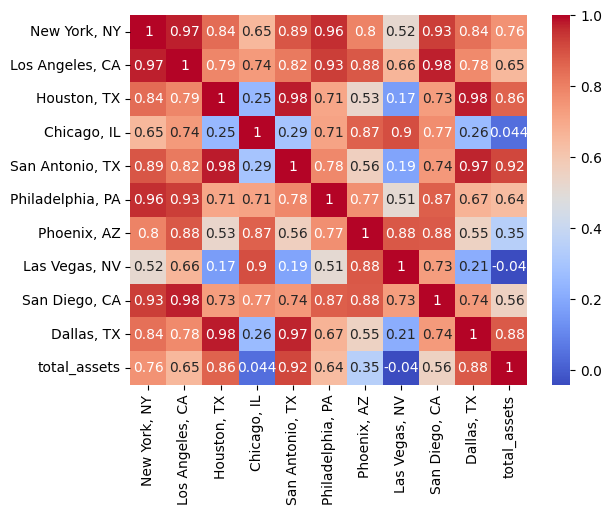

In [55]:
corr_matrix = top_tier_assets.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('seaborn Metro TT vs Fed.png')

In [56]:
filepath = Path('bottom_tier_by_date.csv')
bottom = pd.read_csv(filepath)
bottom.rename(columns={'date': 'Date'}, inplace=True)
columns_to_select = (['Date', 'New York, NY', 'Los Angeles, CA', 'Houston, TX', 'Chicago, IL', 'San Antonio, TX', 'Philadelphia, PA', 'Phoenix, AZ', 'Las Vegas, NV', 'San Diego, CA', 'Dallas, TX'])
bottom_filtered = bottom.loc[:, columns_to_select]
bottom_filtered

Date   New York, NY  Los Angeles, CA    Houston, TX    Chicago, IL  \
0    2000-01-31  102107.057069    124854.660790   59143.888654   57482.934649   
1    2000-02-29  102506.922494    125220.426299   59157.358757   57529.898148   
2    2000-03-31  102897.973204    125798.067126   59121.526850   57627.649694   
3    2000-04-30  103709.380919    126949.232583   59150.910399   57848.486019   
4    2000-05-31  104559.587219    128261.422042   59175.627716   58118.096926   
..          ...            ...              ...            ...            ...   
277  2023-02-28  397837.158059    628038.978226  211108.520316  184651.341291   
278  2023-03-31  402920.639933    626456.198938  211461.898317  187608.259573   
279  2023-04-30  406596.397876    626841.687761  211566.646102  189448.842432   
280  2023-05-31  410525.682545    630472.168504  211919.403154  191090.487868   
281  2023-06-30  414674.081666    636700.976958  212402.066679  193089.417955   

     San Antonio, TX  Philadelphia, PA    Phoenix, AZ  Las Vegas, NV  \
0       52246.606401      50822.158205   75382.707100   89635.099479   
1       52296.348072      50928.001001   75548.208296   89627.264328   
2       52339.173928      51004.931472   75774.078559   89770.593985   
3       52414.211125      51192.650160   76236.461708   90120.598342   
4       52214.641311      51393.913932   76744.166052   90576.878780   
..               ...               ...            ...            ...   
277    192525.572193     198705.267063  336191.234817  299765.936663   
278    194888.672300     200856.602312  335798.206011  298618.881302   
279    195521.898915     201933.720097  335345.392605  298013.245034   
280    195997.472512     203339.088198  335472.035473  297816.587482   
281    196361.018748     204879.550581  336492.922133  298550.240188   

     San Diego, CA     Dallas, TX  
0    120233.530406   63433.381496  
1    120719.255790   63451.170753  
2    121301.877670   63463.701517  
3    122632.563741   63527.553952  
4    124066.529760   63635.820449  
..             ...            ...  
277  620300.988718  257181.389000  
278  623326.051201  257509.933434  
279  627380.142912  257585.587718  
280  632847.740360  258142.044680  
281  640304.628452  259147.787721  

[282 rows x 11 columns]

In [57]:
bottom_tier_assets = pd.concat([bottom_filtered, assets], axis=1, join='inner')
bottom_tier_assets.drop('date', axis=1)

Date   New York, NY  Los Angeles, CA    Houston, TX    Chicago, IL  \
0    2000-01-31  102107.057069    124854.660790   59143.888654   57482.934649   
1    2000-02-29  102506.922494    125220.426299   59157.358757   57529.898148   
2    2000-03-31  102897.973204    125798.067126   59121.526850   57627.649694   
3    2000-04-30  103709.380919    126949.232583   59150.910399   57848.486019   
4    2000-05-31  104559.587219    128261.422042   59175.627716   58118.096926   
..          ...            ...              ...            ...            ...   
244  2020-05-31  307964.025276    468419.323782  151435.712228  136931.495531   
245  2020-06-30  309161.906627    467166.396366  151666.351274  136994.225301   
246  2020-07-31  309682.734669    467749.339637  152162.932490  136785.889806   
247  2020-08-31  310624.637450    471836.846167  153187.287447  137039.066332   
248  2020-09-30  313229.688463    479527.859245  154624.158733  138163.415323   

     San Antonio, TX  Philadelphia, PA    Phoenix, AZ  Las Vegas, NV  \
0       52246.606401      50822.158205   75382.707100   89635.099479   
1       52296.348072      50928.001001   75548.208296   89627.264328   
2       52339.173928      51004.931472   75774.078559   89770.593985   
3       52414.211125      51192.650160   76236.461708   90120.598342   
4       52214.641311      51393.913932   76744.166052   90576.878780   
..               ...               ...            ...            ...   
244    139117.192021     144834.423288  233470.254870  223880.823958   
245    139498.082117     145315.920592  234773.038437  224122.552492   
246    140074.089859     145337.427933  235868.338728  223912.660337   
247    141134.344715     145744.391926  237537.702939  223993.650436   
248    142914.103296     147215.546994  240297.253738  224754.000474   

     San Diego, CA     Dallas, TX  total_assets  
0    120233.530406   63433.381496           NaN  
1    120719.255790   63451.170753      724718.0  
2    121301.877670   63463.701517      721326.0  
3    122632.563741   63527.553952      723651.0  
4    124066.529760   63635.820449      736926.0  
..             ...            ...           ...  
244  452924.883318  181147.015976     8600803.0  
245  453330.541542  181084.555983     8457176.0  
246  452941.836266  181373.143405     8370156.0  
247  453838.265584  182404.571955     8278283.0  
248  457454.409907  184278.196458           NaN  

[249 rows x 12 columns]

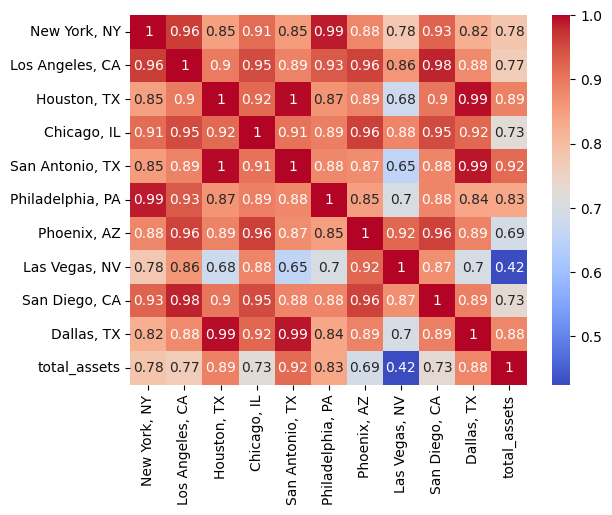

In [58]:
corr_matrix = bottom_tier_assets.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('seaborn Metro BT vs Fed.png')

In [72]:
path = Path('one_bedroom_by_date.csv')
obr = pd.read_csv(path)
obr.rename(columns={'date': 'Date'}, inplace=True)

In [73]:
columns_to_select = (['Date', 'New York, NY', 'Los Angeles, CA', 'Houston, TX', 'Chicago, IL', 'San Antonio, TX', 'Philadelphia, PA', 'Phoenix, AZ', 'Las Vegas, NV', 'San Diego, CA', 'Dallas, TX'])
obr_filtered = obr.loc[:, columns_to_select]

In [74]:
assets_obr = pd.concat([obr_filtered, assets], axis=1, join='inner')

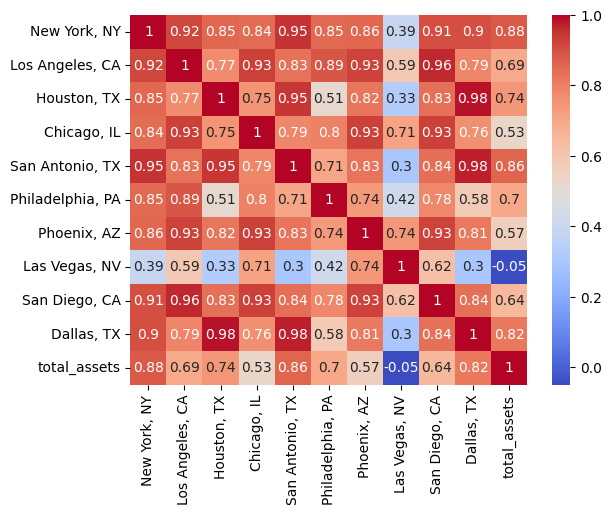

In [75]:
corr_matrix = assets_obr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('seaborn Metro OBR vs Fed.png')